In [3]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set()

# requirements file to make: pip freeze > requirements.txt
# file names: BBox_List_2017, Data_Entry_2017

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
nRowsRead = 1000
filename = "BBox_List_2017"
df1 = pd.read_csv('./archive/{}.csv'.format(filename), delimiter=',', nrows = nRowsRead)
df1.dataframeName = '{}.csv'.format(filename)
nRow, nCol = df1.shape

In [5]:
print(df1['Finding Label'].value_counts())

Finding Label
Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: count, dtype: int64


In [6]:
print(df1.sample(5))


          Image Index Finding Label     Bbox [x           y           w  \
478  00029861_013.png    Infiltrate  193.991111  185.780156  608.711111   
186  00028509_026.png  Cardiomegaly  310.779661  400.000000  505.491525   
173  00011322_006.png  Cardiomegaly  365.016949  485.188708  481.627119   
276  00012094_006.png  Cardiomegaly  403.098413  413.934392  413.934392   
837  00009863_058.png     Pneumonia  314.243386  372.757672  182.044444   

             h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
478  501.760000         NaN         NaN         NaN  
186  343.864407         NaN         NaN         NaN  
173  314.576271         NaN         NaN         NaN  
276  404.182011         NaN         NaN         NaN  
837  262.230688         NaN         NaN         NaN  


Display Random Images


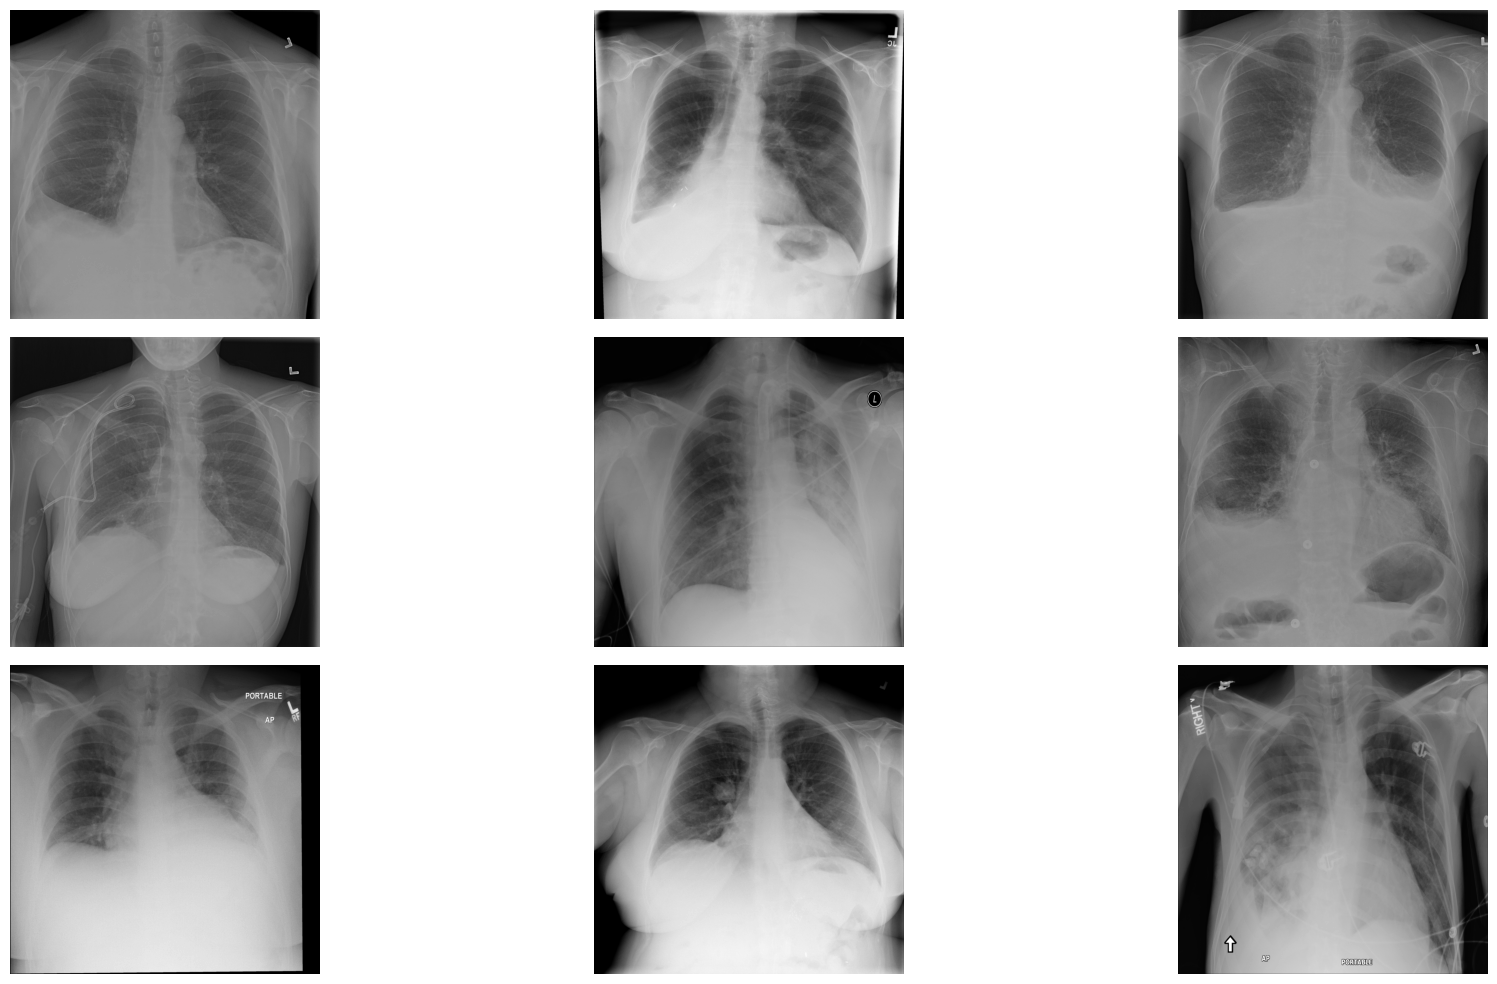

In [8]:
images = df1['Image Index'].values


#random 9 images from the dataset
random_images = [np.random.choice(images) for i in range(9)]

img_dir = './archive/images'
print('Display Random Images')

plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')


plt.tight_layout()


Display Random Images


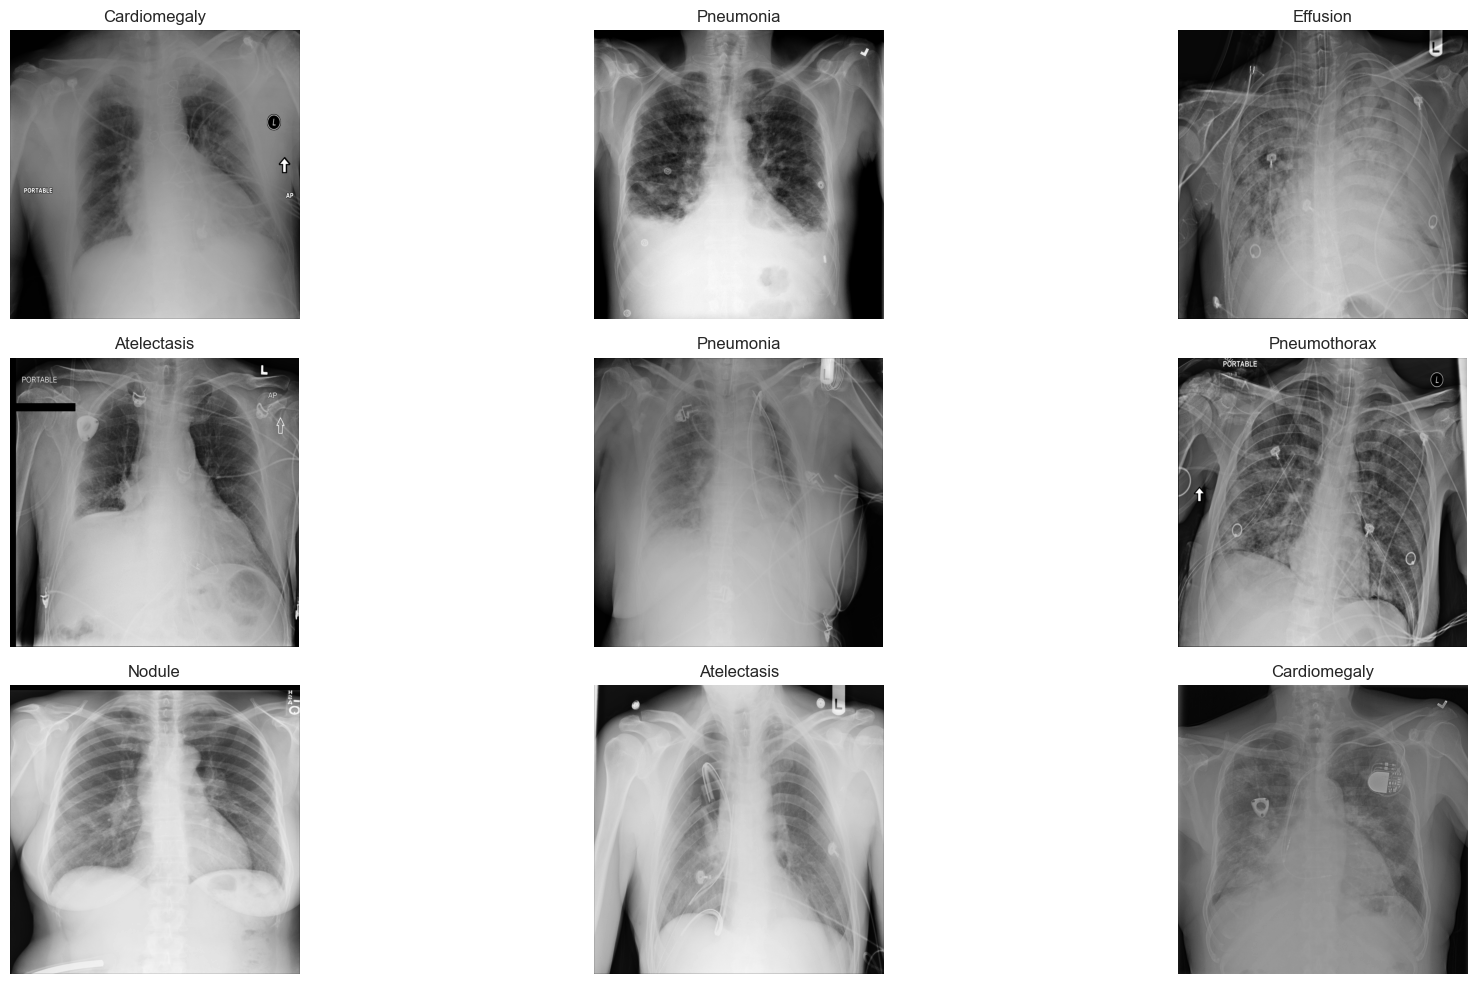

In [17]:
import random
data_tuples = list(zip(df1['Image Index'], df1['Finding Label']))
random_samples = random.sample(data_tuples, 9)
img_dir = './archive/images'
print('Display Random Images')

plt.figure(figsize=(20,10))
for i, (img_name, label) in enumerate(random_samples):
    img_path = os.path.join(img_dir, img_name)
    img = plt.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label)  # Display the label as the title
    plt.axis('off')

plt.tight_layout()
plt.show()


The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4478 and the standard deviation is 0.1722


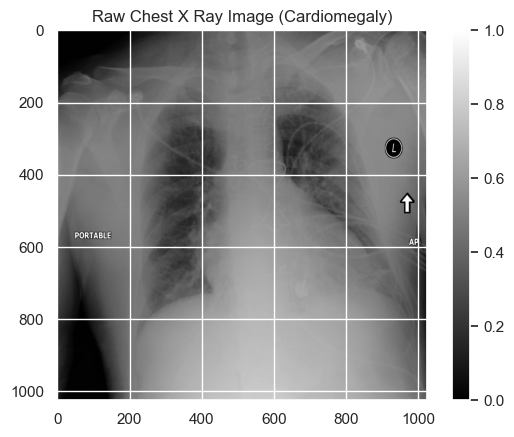

In [18]:
sample_image_list = random_samples[0]
sample_img = sample_image_list[0]
sample_title = sample_image_list[1]

raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image' + ' (' + sample_title + ')')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")
plt.show()

C:\Users\hamma\AppData\Local\Temp\ipykernel_30676\2517688598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

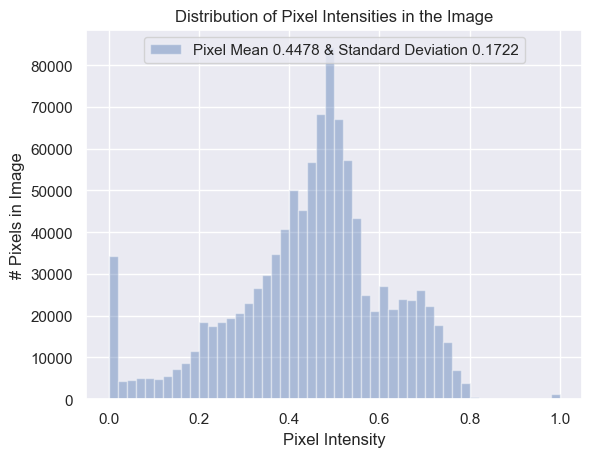

In [19]:
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

Found 984 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.7282 and the minimum is -1.6358
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


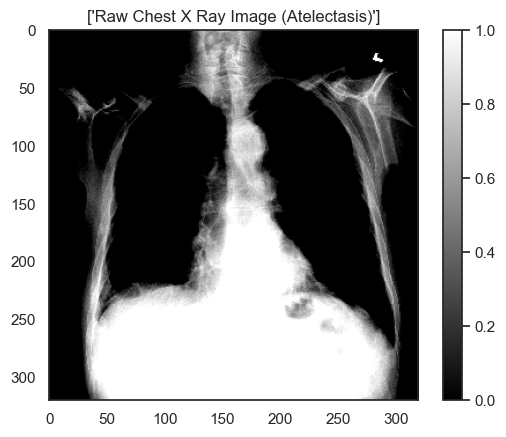

In [21]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True,  # Divide each input by its standard deviation

)

generator = image_generator.flow_from_dataframe(
        dataframe=df1,
        directory="./archive/images",
        x_col="Image Index", # features
        # Let's say we build a model for mass detection
        y_col= ['Finding Label'], # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image' + ' (' + label[0] + ')')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")
plt.show()


C:\Users\hamma\AppData\Local\Temp\ipykernel_30676\3463288732.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),
C:\Users\hamma\AppData\Local\Temp\ipykernel_30676\3463288732.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image[0].ravel(),


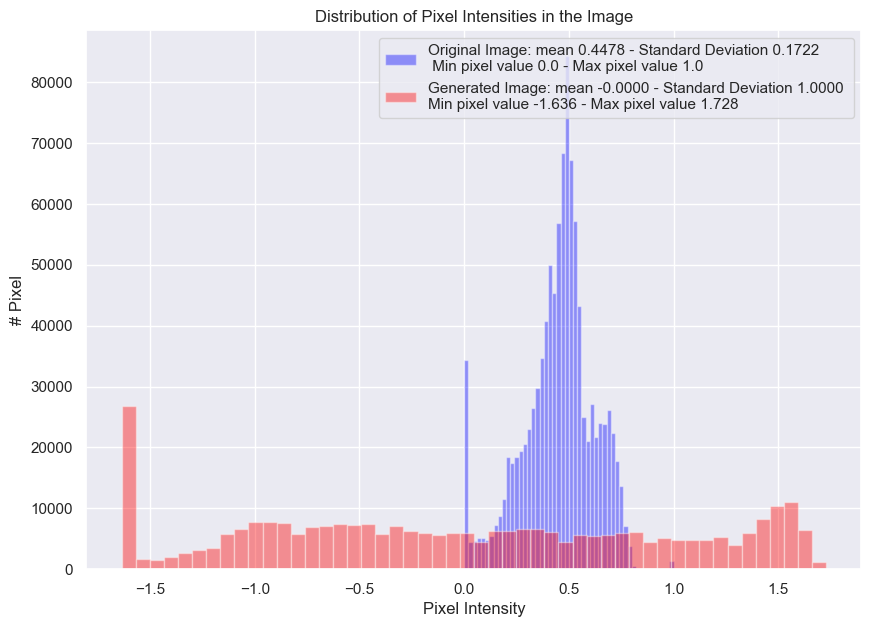

In [22]:
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(),
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue',
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(),
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}',
             color='red',
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')
plt.show()